## This notebook assumes you have the following packages installed in your conda environment.

In [49]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [50]:
df_default = pd.read_csv('../generated-data/default-nd.csv')
df_default.shape


(144, 183)

In [51]:
df_default

,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,Complexity,SignFrequency(M-Nonnative),SignFrequency(SD-Nonnative),SignFreq(Z-Nonnative),SignFrequency(N-Nonnative),PercentGlossAgreement(Nonnative),PercentUnknown(Nonnative),PhonotacticProbability,VimeoVideo,Neighborhood Density
0,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",3.034,1.500,-0.728,29,0.000,2.944,...,2,3.18,1.60,-0.54,12,0,0.083,5.787,https://player.vimeo.com/video/345587917,0
1,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",5.120,1.716,0.302,25,0.000,5.214,...,1,5.00,1.61,0.23,11,0,0.000,6.633,https://player.vimeo.com/video/344399314,0
2,8_hour,8_hour,C_02_055,"<iframe width=""280"" height=""158"" src=""https://...",4.267,1.574,-0.025,30,0.000,4.444,...,4,4.00,1.35,-0.02,12,0,0.000,4.588,https://player.vimeo.com/video/345588916,0
3,9_oclock,9_oclock,C_02_080,"<iframe width=""280"" height=""158"" src=""https://...",4.133,1.592,-0.122,30,0.000,4.778,...,1,3.17,1.27,-0.50,12,0,0.000,5.131,https://player.vimeo.com/video/345589804,0
4,a-line_bob,a-line_bob,K_03_127,NaN,4.273,1.804,0.030,25,0.120,4.500,...,2,4.14,2.14,-0.15,14,0,0.000,6.406,https://player.vimeo.com/video/342308099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,band_aid_1,band_aid,F_02_020,"<iframe width=""280"" height=""158"" src=""https://...",2.864,1.246,-0.850,27,0.185,2.750,...,3,3.00,1.25,-0.73,13,0,0.231,6.564,https://player.vimeo.com/video/346494250,0
140,band_aid_2,band_aid,H_01_088,"<iframe width=""280"" height=""158"" src=""https://...",3.893,1.618,-0.104,28,0.000,4.000,...,4,3.79,1.72,-0.16,14,0,0.000,6.551,https://player.vimeo.com/video/346796402,0
141,bandage,bandage,F_03_020,"<iframe width=""280"" height=""158"" src=""https://...",3.000,1.732,-0.716,27,0.074,2.833,...,2,3.15,1.86,-0.60,13,0,0.000,6.490,NaN,0
142,bank,bank,D_02_032,"<iframe width=""280"" height=""158"" src=""https://...",4.741,1.559,0.286,27,0.000,4.765,...,3,4.70,1.34,0.34,10,0,0.000,5.825,https://player.vimeo.com/video/345971156,0


In [52]:
df_sign = pd.read_csv('../data/signdata.csv')
df_sign.shape

(2723, 178)

In [53]:
df_sign

,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignBankEnglishTranslations,Complexity,SignFrequency(M-Nonnative),SignFrequency(SD-Nonnative),SignFreq(Z-Nonnative),SignFrequency(N-Nonnative),PercentGlossAgreement(Nonnative),PercentUnknown(Nonnative),PhonotacticProbability,VimeoVideo
0,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",3.034,1.500,-0.728,29,0.00,2.944,...,"bill, cash, dollar, money",2.0,3.18,1.60,-0.54,12,0,0.083,5.787,https://player.vimeo.com/video/345587917
1,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",5.120,1.716,0.302,25,0.00,5.214,...,"dollar, five dollars, money",1.0,5.00,1.61,0.23,11,0,0.000,6.633,https://player.vimeo.com/video/344399314
2,8_hour,8_hour,C_02_055,"<iframe width=""280"" height=""158"" src=""https://...",4.267,1.574,-0.025,30,0.00,4.444,...,"eight hours, 8 hours, hour, time",4.0,4.00,1.35,-0.02,12,0,0.000,4.588,https://player.vimeo.com/video/345588916
3,9_oclock,9_oclock,C_02_080,"<iframe width=""280"" height=""158"" src=""https://...",4.133,1.592,-0.122,30,0.00,4.778,...,"9:00, 9 o'clock, nine o'clock, o'clock, time",1.0,3.17,1.27,-0.50,12,0,0.000,5.131,https://player.vimeo.com/video/345589804
4,a-line_bob,a-line_bob,K_03_127,NaN,4.273,1.804,0.030,25,0.12,4.500,...,NaN,2.0,4.14,2.14,-0.15,14,0,0.000,6.406,https://player.vimeo.com/video/342308099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,zero,zero,D_03_036,"<iframe width=""280"" height=""158"" src=""https://...",4.192,1.415,0.051,26,0.00,4.313,...,"0, none, number, zero, zilch",1.0,4.00,1.83,0.02,10,0,0.000,7.687,https://player.vimeo.com/video/345983725
2719,zipper,zipper,D_01_034,"<iframe width=""280"" height=""158"" src=""https://...",3.148,1.610,-0.556,27,0.00,2.875,...,"coat, jacket, zipper",1.0,3.55,1.97,-0.31,11,0,0.000,4.371,https://player.vimeo.com/video/345804301
2720,zoo,zoo,E_03_042,"<iframe width=""280"" height=""158"" src=""https://...",3.533,1.776,-0.346,30,0.00,3.857,...,NaN,3.0,3.25,1.65,-0.44,16,0,0.000,5.043,https://player.vimeo.com/video/346067693
2721,zoom_in,zoom_in,B_02_056,"<iframe width=""280"" height=""158"" src=""https://...",3.958,1.781,-0.443,24,0.04,3.929,...,"computer screen, enlarge, expand, make bigger,...",1.0,4.00,2.21,-0.45,11,0,0.091,5.477,https://player.vimeo.com/video/345555455


In [54]:
df_sign['SignBankEnglishTranslations'].value_counts()

cry out, shout, scream, yell                                                    4
canine, dog, puppy                                                              4
clip, cut, scissors, snip, trim                                                 3
especially, except, special, unique                                             3
chaos, chaotic, disrupt, hectic, mess, messed up, mess up, messy, thrown off    3
                                                                               ..
call, call-tty, phone, TDD, telephone, to call on a TTY, TTY                    1
grammar, grammatical                                                            1
heaven, the sky above                                                           1
line, line of people, to line up, queue                                         1
association, group, initialized, organization, organize                         1
Name: SignBankEnglishTranslations, Length: 1803, dtype: int64

In [55]:
df_default["Code"].values

array(['C_02_025', 'B_01_062', 'C_02_055', 'C_02_080', 'K_03_127',
       'H_03_025', 'G_01_040', 'B_02_072', 'B_02_003', 'J_01_027',
       'E_01_073', 'H_02_042', 'H_02_086', 'B_02_059', 'C_02_085',
       'F_02_048', 'A_03_044', 'H_01_034', 'B_02_038', 'C_01_026',
       'A_03_047', 'E_02_030', 'H_02_073', 'D_01_016', 'J_03_049',
       'J_02_062', 'J_03_014', 'C_03_008', 'H_03_059', 'J_03_015',
       'A_02_082', 'B_02_030', 'J_01_040', 'J_02_013', 'H_03_003',
       'B_02_071', 'H_01_044', 'C_02_078', 'D_03_068', 'C_01_085',
       'H_02_087', 'E_03_012', 'H_02_022', 'C_03_088', 'H_02_093',
       'J_03_021', 'H_01_096', 'J_02_064', 'H_03_078', 'J_01_044',
       'H_01_084', 'D_02_024', 'B_02_024', 'J_03_025', 'J_03_076',
       'D_02_093', 'C_02_006', 'G_02_075', 'B_03_072', 'A_03_085',
       'B_01_070', 'B_03_002', 'C_01_086', 'E_03_065', 'F_01_027',
       'G_01_016', 'H_01_059', 'E_02_033', 'C_03_064', 'A_03_054',
       'C_01_088', 'H_02_070', 'G_03_060', 'H_02_015', 'F_03_0

## Community Analysis

In [56]:
edges_df = pd.read_csv('../generated-data/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_03_044,C_01_085,11,"Flexion.2.0, FlexionChange.2.0, ThumbPosition....",1,SelectedFingers.2.0
1,A_03_047,B_02_038,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0
2,B_01_059,G_01_064,8,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
3,B_02_024,J_03_068,7,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
4,B_02_038,A_03_047,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0


In [57]:
edges_df.shape

(44, 6)

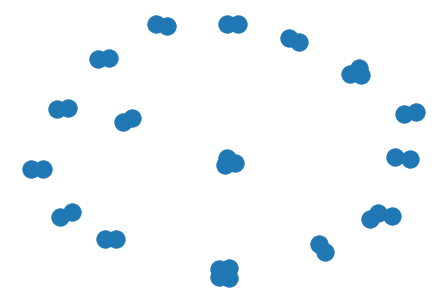

In [58]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [59]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g

#Two methods for community analysis
c = greedy_modularity_communities(G)
partition = community.best_partition(G)

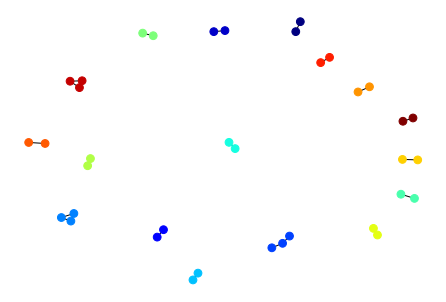

In [60]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [61]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

37


In [62]:
len(partition)

37

In [63]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

37


,Code,group_id
0,C_01_085,0
1,A_03_044,0
2,B_02_038,1
3,A_03_047,1
4,G_01_064,2


In [64]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

37
(44, 6)
(44, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_03_044,C_01_085,11,"Flexion.2.0, FlexionChange.2.0, ThumbPosition....",1,SelectedFingers.2.0
1,A_03_047,B_02_038,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0
2,B_01_059,G_01_064,8,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
3,B_02_024,J_03_068,7,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
4,B_02_038,A_03_047,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0


In [65]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
# print(df_merged.columns.values)
df_merged.head(20)

(144, 184)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignFrequency(M-Nonnative),SignFrequency(SD-Nonnative),SignFreq(Z-Nonnative),SignFrequency(N-Nonnative),PercentGlossAgreement(Nonnative),PercentUnknown(Nonnative),PhonotacticProbability,VimeoVideo,Neighborhood Density,group_id
0,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",3.034,1.500,-0.728,29,0.000,2.944,...,3.18,1.60,-0.54,12,0,0.083,5.787,https://player.vimeo.com/video/345587917,0,NaN
1,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",5.120,1.716,0.302,25,0.000,5.214,...,5.00,1.61,0.23,11,0,0.000,6.633,https://player.vimeo.com/video/344399314,0,NaN
2,8_hour,8_hour,C_02_055,"<iframe width=""280"" height=""158"" src=""https://...",4.267,1.574,-0.025,30,0.000,4.444,...,4.00,1.35,-0.02,12,0,0.000,4.588,https://player.vimeo.com/video/345588916,0,NaN
3,9_oclock,9_oclock,C_02_080,"<iframe width=""280"" height=""158"" src=""https://...",4.133,1.592,-0.122,30,0.000,4.778,...,3.17,1.27,-0.50,12,0,0.000,5.131,https://player.vimeo.com/video/345589804,0,NaN
4,a-line_bob,a-line_bob,K_03_127,NaN,4.273,1.804,0.030,25,0.120,4.500,...,4.14,2.14,-0.15,14,0,0.000,6.406,https://player.vimeo.com/video/342308099,0,NaN
5,a_little_bit,a_little_bit,H_03_025,"<iframe width=""280"" height=""158"" src=""https://...",2.963,2.028,-0.762,28,0.036,3.000,...,2.93,1.82,-0.79,14,0,0.000,3.540,https://player.vimeo.com/video/346887448,0,NaN
6,abbreviate,abbreviate,G_01_040,"<iframe width=""280"" height=""158"" src=""https://...",5.444,1.528,0.669,27,0.000,5.250,...,5.60,1.55,0.75,15,1,0.000,6.107,https://player.vimeo.com/video/346610443,0,NaN
7,about_1,about,B_02_072,"<iframe width=""280"" height=""158"" src=""https://...",5.480,1.475,0.523,25,0.000,5.500,...,5.46,1.04,0.53,11,0,0.000,4.256,https://player.vimeo.com/video/345555837,0,NaN
8,about_2,about,B_02_003,"<iframe width=""280"" height=""158"" src=""https://...",3.522,1.534,-0.762,23,0.080,3.417,...,3.64,1.57,-0.73,11,0,0.000,4.371,https://player.vimeo.com/video/345536316,0,NaN
9,absolutely_nothing,absolutely_nothing,J_01_027,"<iframe width=""280"" height=""158"" src=""https://...",2.957,1.821,-0.686,30,0.233,2.833,...,3.09,1.76,-0.44,15,0,0.267,6.723,https://player.vimeo.com/video/346914407,0,NaN


In [66]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0      1000.0
1      1000.0
2      1000.0
3      1000.0
4      1000.0
        ...  
139    1000.0
140    1000.0
141    1000.0
142    1000.0
143    1000.0
Name: group_id, Length: 144, dtype: float64


array([1000.,    0.,    1.,   14.,    6.,    7.,   15.,    5.,    8.,
          3.,   13.,    4.,   11.,    2.,   16.,   12.,   10.,    9.])

In [67]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 1000, 'color_code': '#789202'},
 {'group_id': 0.0, 'color_code': '#893aef'},
 {'group_id': 1.0, 'color_code': '#7d057f'},
 {'group_id': 14.0, 'color_code': '#965aa8'},
 {'group_id': 6.0, 'color_code': '#11ad9f'},
 {'group_id': 7.0, 'color_code': '#4b7cf3'},
 {'group_id': 15.0, 'color_code': '#91607c'},
 {'group_id': 5.0, 'color_code': '#2729f0'},
 {'group_id': 8.0, 'color_code': '#99bb8e'},
 {'group_id': 3.0, 'color_code': '#1d1ae8'},
 {'group_id': 13.0, 'color_code': '#7471fd'},
 {'group_id': 4.0, 'color_code': '#520ba2'},
 {'group_id': 11.0, 'color_code': '#1e84ce'},
 {'group_id': 2.0, 'color_code': '#dc7173'},
 {'group_id': 16.0, 'color_code': '#9a6685'},
 {'group_id': 12.0, 'color_code': '#894c11'},
 {'group_id': 10.0, 'color_code': '#7d9440'},
 {'group_id': 9.0, 'color_code': '#3f97f2'}]

In [78]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#789202">Sample</span>.

<br><span style="color:#893aef">Sample</span>.

<br><span style="color:#7d057f">Sample</span>.

<br><span style="color:#965aa8">Sample</span>.

<br><span style="color:#11ad9f">Sample</span>.

<br><span style="color:#4b7cf3">Sample</span>.

<br><span style="color:#91607c">Sample</span>.

<br><span style="color:#2729f0">Sample</span>.

<br><span style="color:#99bb8e">Sample</span>.

<br><span style="color:#1d1ae8">Sample</span>.

<br><span style="color:#7471fd">Sample</span>.

<br><span style="color:#520ba2">Sample</span>.

<br><span style="color:#1e84ce">Sample</span>.

<br><span style="color:#dc7173">Sample</span>.

<br><span style="color:#9a6685">Sample</span>.

<br><span style="color:#894c11">Sample</span>.

<br><span style="color:#7d9440">Sample</span>.

<br><span style="color:#3f97f2">Sample</span>.

In [79]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(144, 185)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignFrequency(SD-Nonnative),SignFreq(Z-Nonnative),SignFrequency(N-Nonnative),PercentGlossAgreement(Nonnative),PercentUnknown(Nonnative),PhonotacticProbability,VimeoVideo,Neighborhood Density,group_id,color_code
0,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",3.034,1.500,-0.728,29,0.00,2.944,...,1.60,-0.54,12,0,0.083,5.787,https://player.vimeo.com/video/345587917,0,1000.0,#789202
1,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",5.120,1.716,0.302,25,0.00,5.214,...,1.61,0.23,11,0,0.000,6.633,https://player.vimeo.com/video/344399314,0,1000.0,#789202
2,8_hour,8_hour,C_02_055,"<iframe width=""280"" height=""158"" src=""https://...",4.267,1.574,-0.025,30,0.00,4.444,...,1.35,-0.02,12,0,0.000,4.588,https://player.vimeo.com/video/345588916,0,1000.0,#789202
3,9_oclock,9_oclock,C_02_080,"<iframe width=""280"" height=""158"" src=""https://...",4.133,1.592,-0.122,30,0.00,4.778,...,1.27,-0.50,12,0,0.000,5.131,https://player.vimeo.com/video/345589804,0,1000.0,#789202
4,a-line_bob,a-line_bob,K_03_127,NaN,4.273,1.804,0.030,25,0.12,4.500,...,2.14,-0.15,14,0,0.000,6.406,https://player.vimeo.com/video/342308099,0,1000.0,#789202


In [80]:
df_merged_with_color.shape

(144, 185)

In [81]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(144, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,1_dollar,C_02_025,1000.0,#789202,-0.728
1,5_dollars,B_01_062,1000.0,#789202,0.302
2,8_hour,C_02_055,1000.0,#789202,-0.025
3,9_oclock,C_02_080,1000.0,#789202,-0.122
4,a-line_bob,K_03_127,1000.0,#789202,0.030
5,a_little_bit,H_03_025,1000.0,#789202,-0.762
6,abbreviate,G_01_040,1000.0,#789202,0.669
7,about_1,B_02_072,1000.0,#789202,0.523
8,about_2,B_02_003,1000.0,#789202,-0.762
9,absolutely_nothing,J_01_027,1000.0,#789202,-0.686


In [82]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_03_044,C_01_085,11,"Flexion.2.0, FlexionChange.2.0, ThumbPosition....",1,SelectedFingers.2.0
1,A_03_047,B_02_038,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0
2,B_01_059,G_01_064,8,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
3,B_02_024,J_03_068,7,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,Movement.2.0
4,B_02_038,A_03_047,9,"SelectedFingers.2.0, ThumbPosition.2.0, SignTy...",1,SecondMinorLocation.2.0


In [83]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_03_044,C_01_085
1,A_03_047,B_02_038
2,B_01_059,G_01_064
3,B_02_024,J_03_068
4,B_02_038,A_03_047


In [84]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_03_044', 'source': 'C_01_085'}

In [85]:
cols_not_in_sign_pane = ["LemmaID","Code","SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(M) all","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","empirical_aoa","HandshapeManualCorrections","FormerKnackGloss","SignBankID","CodingSignBank","InZed","Checked Vimeo"]

In [89]:
#Remove cols in sign pane
#Keep column for filters and vimeo video
cols_in_sign_data_pane = ["EntryID","SignFrequency(M)","PercentUnknown","PercentGlossAgreement","DominantTranslation","SubtLexUSLog10WF","Iconicity(M)","Transparency M","H index","LexicalClass","SignLength(ms)","ClipLength(ms)","Complexity","Initialized.2.0","FingerspelledLoanSign.2.0","Compound.2.0","NumberOfMorphemes.2.0","Handshape.2.0","MarkedHandshape.2.0","SelectedFingers.2.0","Flexion.2.0","FlexionChange.2.0","Spread.2.0","SpreadChange.2.0","ThumbPosition.2.0","ThumbContact.2.0","SignType.2.0","Movement.2.0","RepeatedMovement.2.0","MajorLocation.2.0","MinorLocation.2.0","SecondMinorLocation.2.0","Contact.2.0","NonDominantHandshape.2.0","UlnarRotation.2.0","HandshapeM2.2.0","MarkedHandshapeM2.2.0","SelectedFingersM2.2.0","FlexionM2.2.0","FlexionChangeM2.2.0","SpreadM2.2.0","SpreadChangeM2.2.0","ThumbPositionM2.2.0","ThumbContactM2.2.0","SignTypeM2.2.0","MovementM2.2.0","RepeatedMovementM2.2.0","MajorLocationM2.2.0","MinorLocationM2.2.0","SecondMinorLocationM2.2.0","ContactM2.2.0","NonDominantHandshapeM2.2.0","UlnarRotationM2.2.0","HandshapeM3.2.0","MarkedHandshapeM3.2.0","SelectedFingersM3.2.0","FlexionM3.2.0","FlexionChangeM3.2.0","SpreadM3.2.0","SpreadChangeM3.2.0","ThumbPositionM3.2.0","ThumbContactM3.2.0","SignTypeM3.2.0","MovementM3.2.0","RepeatedMovementM3.2.0","MajorLocationM3.2.0","MinorLocationM3.2.0","SecondMinorLocationM3.2.0","ContactM3.2.0","NonDominantHandshapeM3.2.0","UlnarRotationM3.2.0","HandshapeM4.2.0","MarkedHandshapeM4.2.0","SelectedFingersM4.2.0","FlexionM4.2.0","FlexionChangeM4.2.0","SpreadM4.2.0","SpreadChangeM4.2.0","ThumbPositionM4.2.0","ThumbContactM4.2.0","SignTypeM4.2.0","MovementM4.2.0","RepeatedMovementM4.2.0","MajorLocationM4.2.0","MinorLocationM4.2.0","SecondMinorLocationM4.2.0","ContactM4.2.0","NonDominantHandshapeM4.2.0","UlnarRotationM4.2.0","HandshapeM5.2.0","MarkedHandshapeM5.2.0","SelectedFingersM5.2.0","FlexionM5.2.0","FlexionChangeM5.2.0","SpreadM5.2.0","SpreadChangeM5.2.0","ThumbPositionM5.2.0","ThumbContactM5.2.0","SignTypeM5.2.0","MovementM5.2.0","RepeatedMovementM5.2.0","MajorLocationM5.2.0","MinorLocationM5.2.0","SecondMinorLocationM5.2.0","ContactM5.2.0","NonDominantHandshapeM5.2.0","UlnarRotationM5.2.0","HandshapeM6.2.0","MarkedHandshapeM6.2.0","SelectedFingersM6.2.0","FlexionM6.2.0","FlexionChangeM6.2.0","SpreadM6.2.0","SpreadChangeM6.2.0","ThumbPositionM6.2.0","ThumbContactM6.2.0","SignTypeM6.2.0","MovementM6.2.0","RepeatedMovementM6.2.0","MajorLocationM6.2.0","MinorLocationM6.2.0","SecondMinorLocationM6.2.0","ContactM6.2.0","NonDominantHandshapeM6.2.0","UlnarRotationM6.2.0","bglm_aoa","Neighborhood Density 2.0","Parameter.NeighborhooDeafDensity.2.0","SignType.2.0Frequency","MajorLocation.2.0Frequency","MinorLocation.2.0Frequency","SecondMinorLocation.2.0Frequency","Movement.2.0Frequency","SelectedFingers.2.0Frequency","Flexion.2.0Frequency","FlexionChange.2.0Frequency","RepeatedMovement.2.0Frequency","Contact.2.0Frequency","SpreaDeaf2.0Frequency","SpreadChange.2.0Frequency","ThumbContact.2.0Frequency","ThumbPosition.2.0Frequency","UlnarRotation.2.0Frequency","PhonotacticProbability","SignBankReferenceID","SignBankLemmaID","SignBankAnnotationID","SignBankSemanticField","SignBankEnglishTranslations"]

In [87]:
#### Get rid of morpheme columbs
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in cols_not_in_sign_pane:
    if col in test_df.columns:
        print("dropping" + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

185
droppingLemmaID
droppingCode
droppingSignFrequency(SD)
droppingSignFrequency(Z)
droppingSignFrequency(N)
droppingSignFrequency(M-Native)
droppingSignFrequency(SD-Native)
droppingSignFreq(Z-native)
droppingSignFrequency(N-Native)
droppingPercentUnknown(Native)
droppingPercentGlossAgreement(Native)
droppingSignFrequency(M-Nonnative)
droppingSignFrequency(SD-Nonnative)
droppingSignFreq(Z-Nonnative)
droppingSignFrequency(N-Nonnative)
droppingPercentUnknown(Nonnative)
droppingPercentGlossAgreement(Nonnative)
droppingIconicity(SD)
droppingIconicity(Z)
droppingIconicity(N)
droppingIconicity_ID
droppingD.Iconicity(M) all
droppingD.Iconicity(SD) all
droppingD.Iconicity(Z) all
droppingD.Iconicity(N) all
droppingD.Iconicity(M) native
droppingD.Iconicity(SD) native
droppingD.Iconicity(Z) native
droppingD.Iconicity(N) native
droppingTransparency SD
droppingTransparency Z
droppingSignOnset(ms)
droppingSignOffset(ms)
droppingIconicityType
droppingempirical_aoa


150

In [90]:
for col in cols_in_sign_data_pane:
    if col not in test_df.columns:
        print("This column is not present: " + col)

This column is not present: RepeatedMovement.2.0
This column is not present: RepeatedMovementM2.2.0
This column is not present: RepeatedMovementM3.2.0
This column is not present: RepeatedMovementM4.2.0
This column is not present: RepeatedMovementM5.2.0
This column is not present: RepeatedMovementM6.2.0
This column is not present: Parameter.NeighborhooDeafDensity.2.0
This column is not present: SpreaDeaf2.0Frequency
This column is not present: SignBankReferenceID


In [51]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr:
        categorical_attr.append(column)   
# print(numerical_attr)
# print(categorical_attr)

In [52]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    constraints[attr]['min'] = math.floor(min(columnsData.values))
    constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

{'ClipLength(ms)': {'max': 3737, 'min': 701},
 'Compound.2.0': {'max': 1, 'min': 0},
 'Contact.2.0': {'max': 1, 'min': 0},
 'Contact.2.0Frequency': {'max': 1694, 'min': 1030},
 'D.Iconicity(M) all': {'max': 7, 'min': 1},
 'D.Iconicity(M) native': {'max': 7, 'min': 1},
 'D.Iconicity(N) all': {'max': 31, 'min': 26},
 'D.Iconicity(N) native': {'max': 22, 'min': 18},
 'D.Iconicity(SD) all': {'max': 3, 'min': 0},
 'D.Iconicity(SD) native': {'max': 3, 'min': 0},
 'D.Iconicity(Z) all': {'max': 3, 'min': -2},
 'D.Iconicity(Z) native': {'max': 3, 'min': -2},
 'DominantTranslation': ['corn_2',
                         'wring',
                         'boots',
                         'think_over',
                         'see_see',
                         'emotion',
                         'sunbathe_2',
                         'wash_face',
                         'short',
                         'pile',
                         'pipe',
                         'ceiling',
                 

                                 'clinic, hospital, hospital head',
                                 'haunted, horror, monster, scary',
                                 'autumn, fall, season',
                                 'destination, to, until, up to',
                                 'bald, bare, bareheaded',
                                 'BING, bing, habit, likely, tendency, tend '
                                 'to, typical, typically',
                                 'stand, stand up, upright',
                                 'experience',
                                 'America, United States, US, USA',
                                 'drag, draw, draw out, elicit, elicitation, '
                                 'get, get out, haul, jerk, lug, pull, pull '
                                 'out, recruit, tow, tug, yank',
                                 'assess, evaluate, evaluation, experiment',
                                 'again and again, frequent, often, re

                  'ART',
                  'TENNIS',
                  'INDEPENDENT',
                  'PEABRAIN',
                  'TOOTHBRUSH',
                  'LONG-AGOneut\t',
                  'SKIP',
                  'LIPSTICK',
                  'DAY',
                  'NINE',
                  'CITYtap\t',
                  'COOLf',
                  'REMIND',
                  'CRY',
                  'MICROWAVE',
                  'ALCOHOL',
                  'EIGHT',
                  'VOMIT',
                  'FORBID',
                  'SINGLE-OUT\t',
                  'DISAPPEAR',
                  'SCREWDRIVER',
                  'INHALE',
                  'PARACHUTE',
                  'MINUTEb',
                  'OPEN-WINDOW\t',
                  'HEAVY',
                  'PLAYER',
                  'BANANAfull',
                  'OLD',
                  'CONFUSEDix',
                  'WATERDROP',
                  'USED-TO\t',
                  'VIDEO-GAME

           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/pinkMKABMbk?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/x-SLyjzqpWA?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/TN00OxGVbMU?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/ydK2ekHik3I?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Wl9tIeWa8sg?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></ifram

           'src="https://www.youtube.com/embed/rzqvnoCaPVc?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Yfz8bK3vaDo?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/3P6fBTYUeaM?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/7ld4-Gh4fIM?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/_1J7GFrcI3A?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="15

           'src="https://www.youtube.com/embed/I-8-4TvfOnk?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/31H5F5h1E1E?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/HwFgqLFtDGQ?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/3coJw969e1Y?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/CO3p9Q01kr0?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="15

In [53]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'arms-cross',
 'Code': 'J_01_098',
 'group_id': 500.0,
 'color_code': '#36df70',
 'SignFrequency(Z)': -0.458}

In [54]:
no_morphemes_df[no_morphemes_df['Code'].isin(df_default["Code"].values)]


,EntryID,LemmaID,Code,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),SignFrequency(SD-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,video,SignBankEnglishTranslations
0,arms-cross,arms-cross,J_01_098,3.467,2.177,-0.458,30,0,3.400,2.293,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, arms crossed, stern look, what, what h..."
1,raise-hand,raise-hand,H_02_048,5.154,1.891,0.544,28,0,5.500,1.446,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, I have a question, me, raise hand, vol..."
2,sigh,sigh,H_03_086,3.931,1.751,-0.196,30,0,3.267,1.624,...,sigh\t,0,3,0,3,NaN,sigh\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, exasperated, I didn't mean that, I giv..."
3,1_dollar,1_dollar,C_02_025,3.034,1.500,-0.775,29,0,2.944,1.474,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,"<iframe width=""280"" height=""158"" src=""https://...","bill, cash, dollar, money"
4,5_dollars,5_dollars,B_01_062,5.120,1.716,0.302,25,0,5.214,1.847,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,"<iframe width=""280"" height=""158"" src=""https://...","dollar, five dollars, money"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zero,zero,D_03_036,4.192,1.415,0.051,26,0,4.313,1.138,...,ZERO,19,5,19,5,NaN,ZERO,6,"<iframe width=""280"" height=""158"" src=""https://...","0, none, number, zero, zilch"
2724,zipper,zipper,D_01_034,3.148,1.610,-0.556,27,0,2.875,1.310,...,ZIPPER,0,0,0,0,NaN,ZIPPER,0,"<iframe width=""280"" height=""158"" src=""https://...","coat, jacket, zipper"
2725,zoo,zoo,E_03_042,3.533,1.776,-0.346,30,0,3.857,1.916,...,NaN,4,3,4,3,NaN,NaN,3,"<iframe width=""280"" height=""158"" src=""https://...",NaN
2726,zoom_in,zoom_in,B_02_056,3.958,1.781,-0.443,24,0,3.929,1.492,...,ZOOM-IN\t,38,0,38,0,zoom_in,ZOOM-IN\t,0,"<iframe width=""280"" height=""158"" src=""https://...","computer screen, enlarge, expand, make bigger,..."


In [55]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../generated-data/sign_props.json', orient='records')


In [ ]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
## Code to change color in json
color_dictionary


In [ ]:
###Only if you need to edit the graph json files

def filter_dict(d, filter_string):
#     print(filter_string)
    for key, val in d.items():
        if filter_string != key:
            continue
        return key, val

with open('../../visualization/data/graph.json') as graph_json_file:
    data = json.load(graph_json_file)
    for node in data['nodes']:
        if(node['group_id'] == ""):
            node['group_id']= "island"    
#             print(node)
    
    for node in data['nodes']:
        key,val = filter_dict(color_dictionary, str(node['group_id']))
        node['color_code'] = val
        print(node)


In [ ]:
#Resave as JSON

graph = {
    "nodes" : data['nodes'],
    "links": data['links']
}

with open("../generated-data/graph.json", 'w') as file:
    json.dump(graph, file)